In [2]:
# 以辨識手寫數字為例
# 1.以人類觀察的方式來找出規則性，舉例來說如果人類要知道這個圖像是0，可能可以以經驗來推斷1是由上往下的一直線，來判定該數字是否為1
# 2.機器學習，人類想出來的特徵量(輸入資料裡擷取的重要資料，影像辨識領域中有一些有名的特徵量，例:SIFT、SURF等等)，並且用機器學習演算法來做辨識
# 3.深度學習，電腦可以從圖像本身自己擷取特徵量，並自行分類數字的類別

In [ ]:
# 在機器學習問題中，通常會分成訓練資料和測試資料
# 先用訓練資料進行學習，找到最佳模型參數，接著在用測試資料評估訓練後模型的performance
# 因為這個模型最重要的是他的一般化能力
# 也就是評估未知資料的能力!!
# 一個模型如果缺乏一般化的能力，就會變成過度擬合(也就是overfitting)

In [ ]:
# 在神經網路裡，會使用損失函數(loss function)來當作指標，從中尋找模型的最佳參數
# 目前比較常使用的損失函數有兩個，1.均方誤差(mean squared error) 2.交叉商誤差(cross entropy error)

# 1.均方誤差(mean squared error)

In [9]:
# 公式是 E = 1/2 * sigma(k)(yk - tk)^2
# 有點難用文字表達...，可以自行google
# 其中 yk 代表神經網路輸出的結果， tk 代表訓練資料，k 是資料的維度
# 以手寫辨識數字為例，y = [0.1,0.6,0.05,0.0,...] ，t = [0,1,0,0,....]
# 神經網路輸出的 y 是 softmax 函數的輸出，可以看為機率!!代表1的機率是0.6
# t的表達方式是正確答案標籤用1來表達，其餘錯誤標籤都是0，範例是index為1的時候數字是1，所以正確標籤是1，這種表達方式稱為one-hot!!
# 所以這個公式就是計算 "神經網路輸出結果" 和 "正確標籤" 的各元素差的總和
# 也因此若神經網路輸出結果越接近正確答案時，MSE會越小，直到趨近於0
# 當 t = [0,1,0,0,0,0,0,0,0,0]，而 y = [0,1,0,0,0,0,0,0,0,0]時，MSE會等於0，也就是輸出結果最適合訓練資料

import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 假設辨識手寫數字的正確答案是1
t = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 1的機率最高時
y = [0.1, 0.6, 0.05, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
# 6的機率最高時，損失函數的值比較大
y = [0.1, 0.05, 0.05, 0.0, 0.05, 0.6, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.6437499999999999


# 2.交叉商誤差(cross entropy error)

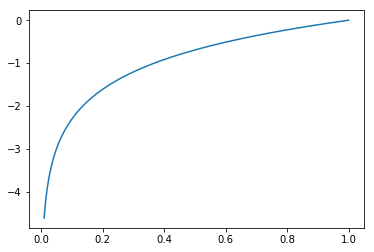

0.510825457099338
2.9957302735559908


In [10]:
# 公式是 E = -sigma(k)(tk * log(以e為底的對數)(yk))
# 有點難用文字表達...，可以自行google
# 數字越小越準確，但實際上只有tk = 1才會有值，其餘皆為0
# 因為tk是正確答案的label，是以one-hot來表示，正確答案為1，其餘為0
# 例如:假設1是正確答案，並且對應的神經網路輸出是0.5，交叉商誤差就是 -ln(0.6) = 0.51，ln是以e為底數的自然對數的表示方法

import matplotlib.pylab as plt

x = np.arange(0.01, 1.0, 0.001)
y = np.log(x)
# 把階梯函數畫出來，是個以0為界線，輸出只有0和1而已
plt.plot(x, y)
plt.show()

# 這個圖是y = ln(x)的圖表
# 可以看到x = 1的時候，y = 0，隨著x趨近於0，y值將會變得趨近負無限大
# 也就是說當np.log(0)的時候，會變成負無限大造成無法運算
# 所以cross_entropy_error方法要加入微小值(delta)，避免發生無限大的狀況

def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    return -np.sum(t * np.log(y + delta))

# 假設辨識手寫數字的正確答案是1
t = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 1的機率最高時
y = [0.1, 0.6, 0.05, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
# 6的機率最高時，損失函數的值比較大
y = [0.1, 0.05, 0.05, 0.0, 0.05, 0.6, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 3.小批次學習

In [12]:
# 假設訓練資料筆數有100筆，那100個損失函數的和就是一個指標，只是為了不讓資料筆數影響損失函數的指標，會把總和再除以100筆，得到平均損失函數!
# 以辨識手寫數字的MNIST資料集來說，有60000筆資料，如果要計算60000筆損失函數的平均要花費一些時間
# 但如果是大數據，資料量達到千萬，甚至億以上的時候，就不太可能計算平均損失函數了
# 所以在訓練神經網路時，會從訓練資料隨機挑選一部份資料，稱做小批次，例如60000筆資料挑選100筆資料做學習，就稱做小批次學習

# 這邊先來個小批次學習的練習
# 可試著自己載入dataset，不管是pandas或tensorflow整理的資料集，以下方式不能在這裡執行
# import numpy as np
# from dataset.mnist import load_mnist
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
# print(x_train.shape) # (60000, 784)
# print(t_train.shape) # (60000, 10)

# 如果要從60000筆資料隨機挑出10筆
# 下面是大致概念
# train_size = x_train.shape[0]
# batch_size = 10
# batch_mask = np.random.choice(train_size, batch_size) # 取得隨機index的陣列
# x_batch = x_train[batch_mask]
# t_batch = t_train[batch_mask]
np.random.choice(60000, 10) # 會得到隨機挑選的10個index的陣列

array([44514, 47199, 24979, 23825, 49778, 26025, 54961, 29350,  8177,
       53702])

In [ ]:
# 以批次版來執行cross entropy error
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# 如果不是使用one-hot，而是2或是6這種標籤，function可改為這樣
# 這邊還需要在更詳細的補充~~~~~~~~~~~~~~~~~~~~~~~
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size


# 4.數值微分

In [21]:
# 因為接下來要介紹很重要的梯度觀念，所以先從微分開始講起
# 微分代表某個瞬間的變化量
# 例如:某個時間前1分鐘的跑步距離，縮短到某個時間前0.1秒的跑步距離，慢慢縮小就可以得到某瞬間的變化量(跑步距離)
# https://zh.wikipedia.org/wiki/%E6%95%B8%E5%80%BC%E5%BE%AE%E5%88%86，維基百科的有限差分法就是在說這個，可參考
# 通常看到df(x)/dx，所代表的就是f(x)這個函數對x作微分(也就是相對於x，f(x)的變化)!!
# 下面是數值微分的實現，只需在h代入極小值即可
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

# 但上面的方法會有兩個問題
# 1.雖然h使用了極小的值，但這樣反而會造成捨去誤差(rounding error)，也就是小數的一部分範圍會被捨去，以python為例
print(np.float32(1e-50)) # 會得到0.0，使用太小的值，電腦在運算時會出現問題，這邊會把h改為1e-4
# 2.上面函數計算了x+h和x的差分，但這個方法本身就會造成誤差
# "真微分"是對應x位置的斜率(切線)，但上面函數計算的卻是x+h和x的斜率，這個差異是因為h無法無限趨近於0所造成!!

# 因此計算x+h和x-h的差分可以減少誤差，這種差分稱為中央差分(x+h和x的差分稱為前差分)，改善兩個問題後的函數如下
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)


0.0


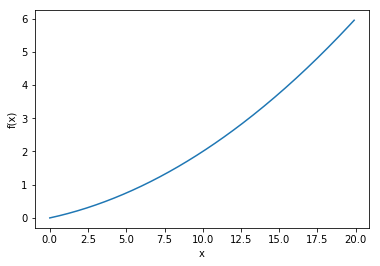

0.1999999999990898
0.2999999999986347


In [22]:
import numpy as np
import matplotlib.pylab as plt

# 來看個範例 y = 0.01 * x^2 + 0.1 * x
def func1(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)
y = func1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

# 來看對應x=5和x=10的微分值，用數值微分的方式來計算
print(numerical_diff(func1, 5)) # 趨近於0.2
print(numerical_diff(func1, 10)) # 趨近於0.3

# 如果用解析解的方式來計算微分值
# 解析解的意思就是先對函數做微分，以上例來看y = 0.01 * x^2 + 0.1 * x，會變成dy/dx = 0.02*x + 0.1
# 這時候代入x=5和x=10會分別得到0.2和0.3的值，與用數值微分的方式計算的值幾乎等同，因誤差非常小，所以用程式計算時都用數值微分來計算


0.1999999999990898


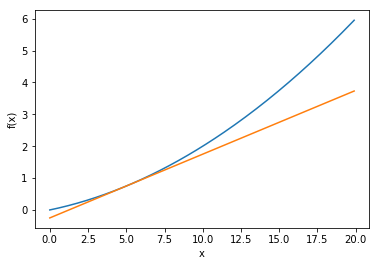

In [25]:
# 畫出切線
# 還不是很清楚式怎麼畫的...
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y # 回傳一個function，t就是該function會傳進來的參數
     
x = np.arange(0.0, 20.0, 0.1)
y = func1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(func1, 5)
y2 = tf(x) # 這個x就是上面提到function傳進來的參數

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 5.偏微分

In [28]:
# f(x0, x1) = x0^2 + x1^2
# 用程式來實現
def func2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2) # 可應付更多變數的狀況
    
# 要對這個函數進行微分時，就會考慮到要對哪個變數做微分，因此由多個變數組成的函數微分就是偏微分
# 偏微分是在多個變數中，鎖定某個變數，將其他變數固定成某數值
# 當x0 = 3，x1 = 4時，計算x0的偏微分
def func_par1(x0):
    return x0**2 + 4.0**2 
print(numerical_diff(func_par1, 3.0))

# 當x0 = 3，x1 = 4時，計算x1的偏微分
def func_par2(x1):
    return 3.0**2 + x1**2 
print(numerical_diff(func_par2, 4.0))


6.00000000000378
7.999999999999119


# 6.梯度!!!

In [62]:
# 要統一進行(x0, x1)的偏微分時，等於是計算(df/dx0, df/dx1)，這邊因為沒辦法打出偏微分的表達符號，所以還是用d來表示
# 這種把函數裡全部變數的偏微分當作向量的方式就稱為 "梯度"!!!
print(np.zeros_like(np.array([[0],[2]])))
print(np.zeros_like(np.array([0,2])),'\n')
# 來用程式定義一下吧~
def num_gra(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 產生和x相同形狀的陣列，element都是0
    # grad = np.zeros(x.shape)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 回復原值
        
    return grad
# 因為輸入的X陣列有可能不是一維的
def numerical_gradient(f, X):
    if X.ndim == 1:
        return num_gra(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = num_gra(f, x)
        
        return grad

print(numerical_gradient(func2,np.array([3.0, 4.0])),'\n')
print(numerical_gradient(func2,np.array([0.0, 2.0])))

[[0]
 [0]]
[0 0] 

[6. 8.] 

[0. 4.]


In [ ]:
# 梯度的向量基本上指向最低的位置，但實際上卻不一定如此
# 比較準確的說法是，梯度顯示的方向是，函數值減少最多的方向!!!
# 在學習神經網路時，就是要找到最適合的參數，也就是損失函數值最小的參數
# 但損失函數一般很複雜而且參數空間太大，因此善用梯度，盡量找出損失函數的最小值，就是所謂的梯度法

# 因為前面有提到的，梯度是在各個位置，指出函數值減少最多的方向，所以不一定指出的位置就是最小值，甚至方向也不一定對!!
# 函數的極小值、最小值、鞍點(saddle point)，梯度都為0，所以也有可能用梯度法找到的結果是除了最小值以外的結果
# 因為梯度法是會隨著要找出最小值獲最大值而變化，若要找出最小值時，稱作梯度下降法(gradient descent method)，
# 反之就是梯度上升法，但其實只差在正負號的反轉，所以本質上是沒有差別的


# 7.梯度下降法

In [50]:
# 用算式來表達梯度下降法，其中lr代表學習率，學習率會決定每一次學習時要更新多少參數，一開始必須先決定一個數值0.01或0.0001
# 學習率太大或太小都不好，太大的話會使誤差超過太多，導致無法收斂，太小的話，收斂速度太慢!!
# x0 = x0 - lr * (df/dx0)
# x1 = x1 - lr * (df/dx1)
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad # x = x - lr * grad

    return x, np.array(x_history)

def func2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(func2, init_x=init_x, lr=0.1)) # array([-6.11110793e-10,  8.14814391e-10]) 趨近於(0,0)
# 可以自行試試看把learning rate調很大或很小試試看會發生甚麼事情

# 像學習率這種參數稱為超參數(hyperparameter)，與神經網路的weight或bias不一樣，這些是在學習中自動產生的參數，
# 超參數則是由人工設定，經過多次試驗找出最適合的參數

(array([-6.11110793e-10,  8.14814391e-10]), array([[-3.00000000e+00,  4.00000000e+00],
       [-2.40000000e+00,  3.20000000e+00],
       [-1.92000000e+00,  2.56000000e+00],
       [-1.53600000e+00,  2.04800000e+00],
       [-1.22880000e+00,  1.63840000e+00],
       [-9.83040000e-01,  1.31072000e+00],
       [-7.86432000e-01,  1.04857600e+00],
       [-6.29145600e-01,  8.38860800e-01],
       [-5.03316480e-01,  6.71088640e-01],
       [-4.02653184e-01,  5.36870912e-01],
       [-3.22122547e-01,  4.29496730e-01],
       [-2.57698038e-01,  3.43597384e-01],
       [-2.06158430e-01,  2.74877907e-01],
       [-1.64926744e-01,  2.19902326e-01],
       [-1.31941395e-01,  1.75921860e-01],
       [-1.05553116e-01,  1.40737488e-01],
       [-8.44424930e-02,  1.12589991e-01],
       [-6.75539944e-02,  9.00719925e-02],
       [-5.40431955e-02,  7.20575940e-02],
       [-4.32345564e-02,  5.76460752e-02],
       [-3.45876451e-02,  4.61168602e-02],
       [-2.76701161e-02,  3.68934881e-02],
       [-2

# 8.神經網路的梯度

In [70]:
# 這邊要以一個最簡單的一層神經網路為例，沒有任何的隱藏層(hidden layer)
# 所以也會用到第二章提到的activation function和矩陣運算等等概念

# 第二章提到的softmax方法，輸出層使用的活化函數，用在分類問題上
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 前面提到的損失函數cross_entropy_error
def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    return -np.sum(t * np.log(y + delta))

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 以常態分佈初始化權重
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

net = simpleNet()
print('初始權重: ',net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print('預測結果: ',p)
print('最大值的index: ',np.argmax(p))
t = np.array([0, 0, 1])
print('損失函數值: ',net.loss(x, t))

# 接著要計算梯度，這裡用了個無用的W參數，因為numerical_gradient(f, x)在函數裡執行f(x)，所以要定義f(W)才有整合性
f = lambda w: net.loss(x, t)

graW = numerical_gradient(f, net.W)
print('梯度: ',graW) # 得到的結果最左上角的代表，改變那個權重會影響整個function的變化量
# 之後只要以梯度下降法更新梯度即可找到最佳權重!

初始權重:  [[ 1.29820283 -1.14351756 -0.2620714 ]
 [-1.41530177 -0.25038932 -0.40462839]]
預測結果:  [-0.4948499  -0.91146092 -0.52140839]
最大值的index:  0
損失函數值:  0.9947080794793444
梯度:  [[ 0.22787097  0.15023016 -0.37810112]
 [ 0.34180645  0.22534524 -0.56715169]]


# 9.學習演算法

In [ ]:
# step1(小批次) ==> 從訓練資料中隨機挑選部分資料稱做小批次，此步驟以減少小批次的損失函數為目標
# step2(計算梯度) ==> 為了減少小批次的損失函數，計算各權重參數的梯度，梯度表示損失函數減少最多的方向
# step3(更新參數) ==> 權重參數往梯度方向更新
# 重複上述步驟
# 這裡使用的是 "準確率梯度下降法" (stochastic gradient descent)，準確率代表準確隨機挑選，縮寫SGD

In [6]:
# 雙層神經網路的示範，一個隱藏層
class TwoLayerNet:
    # 權重初始化
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        # W1的shape是input_size*hidden_size，才可以和input矩陣做相乘
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:輸入資料，t:訓練資料(正確標籤)
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:輸入資料，t:訓練資料(正確標籤)
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
#         dy = (y - t) / batch_num
#         grads['W2'] = np.dot(z1.T, dy)
#         grads['b2'] = np.sum(dy, axis=0)
        
#         da1 = np.dot(dy, W2.T)
#         dz1 = sigmoid_grad(a1) * da1
#         grads['W1'] = np.dot(x.T, dz1)
#         grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [4]:
# 載入資料集
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_train = mnist.train.images
t_train = mnist.train.labels
x_test = mnist.test.images
t_test = mnist.test.labels
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [8]:
def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
        return grad


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [15]:


network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 梯度法更新迭代的次數
train_size = x_train.shape[0]
batch_size = 100 # 小批次數量
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1epoch代表在學習中用完所有資料的次數，10000筆資料做100個小批次學習，此時100次 = 1epoch
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 計算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
#     grad = network.gradient(x_batch, t_batch) # 反向傳播法
    
    # 更新參數
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 儲存學習過程的損失函數值
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        # 每100次記錄一次訓練資料和測試資料的準確率
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 畫圖
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.11234545454545454, 0.1135


KeyboardInterrupt: 